In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# This file contains all the main external libs we'll use
from fastai.imports import *
#from fastai.transforms import *
from fastai.conv_learner import *
#from fastai.model import *
#from fastai.dataset import *
#from fastai.sgdr import *
#from fastai.plots import *

In [3]:
print(torch.__version__)

0.4.0


In [4]:
PATH = "./"

In [5]:
import pydicom
import glob
import os
import numpy
import seaborn as sns
from itertools import chain

In [6]:
lstFilesDCM = []  # create an empty list
'''for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))'''

'for dirName, subdirList, fileList in os.walk(PathDicom):\n    for filename in fileList:\n        if ".dcm" in filename.lower():  # check whether the file\'s DICOM\n            lstFilesDCM.append(os.path.join(dirName,filename))'

In [7]:
metadata = pd.read_csv(f'{PATH}PPMI.csv')

In [8]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,388628,4140,Control,M,76,0,SPECT,Reconstructed DaTSCAN,Processed,4/09/2013,DCM,5/27/2018
1,388627,4139,Control,M,81,0,SPECT,Reconstructed DaTSCAN,Processed,3/19/2013,DCM,5/27/2018
2,388626,4137,PD,M,70,0,SPECT,Reconstructed DaTSCAN,Processed,4/02/2013,DCM,5/27/2018
3,388625,4136,PD,M,56,0,SPECT,Reconstructed DaTSCAN,Processed,2/13/2013,DCM,5/27/2018
4,451290,4135,PD,M,68,5,SPECT,Reconstructed DaTSCAN,Processed,2/18/2014,DCM,5/27/2018


In [9]:
#Shuffle data
metadata = metadata.sample(frac=1).reset_index(drop=True)

In [10]:
metadata[0:5]

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,360618,3769,Control,M,71,0,SPECT,Reconstructed DaTSCAN,Processed,10/25/2012,DCM,5/27/2018
1,388617,4122,PD,M,64,0,SPECT,Reconstructed DaTSCAN,Processed,2/06/2013,DCM,5/27/2018
2,363956,3870,PD,F,41,0,SPECT,Reconstructed DaTSCAN,Processed,11/29/2012,DCM,5/27/2018
3,388601,4107,PD,M,71,0,SPECT,Reconstructed DaTSCAN,Processed,12/21/2012,DCM,5/27/2018
4,419581,3829,PD,F,68,5,SPECT,Reconstructed DaTSCAN,Processed,10/01/2013,DCM,5/27/2018


In [11]:
for file in glob.glob(f'{PATH}PPMI*/**/Reconstructed_DaTSCAN/**/**/*.dcm'):
    lstFilesDCM.append(file)

In [12]:
len(lstFilesDCM)

1569

In [13]:
ptID = []
for i in lstFilesDCM:
    j = i.split("_")[13].strip()
    j = int(j[1:7])
    ptID.append(j)
len(ptID)

1569

In [14]:
p ={}
for o in ptID:
    for k in metadata.iloc[:,0]:
        if o == k:
            p[o] = metadata.loc[metadata['Image Data ID'] == k, 'Group'].tolist()[0]
len(p)

1569

In [15]:
df = metadata[['Image Data ID','Group','Subject','Age','Sex']].set_index('Image Data ID')
for index, rows in df.iterrows():
    for i in lstFilesDCM:
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if index == j:
            df.loc[df.index == j, "Filenames"] = i


In [163]:
#Check duplicate item
bg = []
for i in lstFilesDCM:
    for index, rows in df.iterrows():
        j = i.split("_")[13].strip()
        j = int(j[1:7])
        if j == index:
            bg.append(index)
print( [item for item, count in collections.Counter(bg).items() if count > 1] )
            

In [16]:
lstFilesDCM = df['Filenames'].values

In [17]:
lstFilesDCM = lstFilesDCM.tolist()

In [18]:
df.sample(frac=0.2, axis=0)

,Group,Subject,Age,Sex,Filenames
Image Data ID,,,,,
388578,Control,3969,80,F,./PPMI 9/3969/Reconstructed_DaTSCAN/2013-02-20...
767696,PD,3307,70,M,./PPMI 4/3307/Reconstructed_DaTSCAN/2015-11-05...
913228,PD,4109,71,M,./PPMI 4/4109/Reconstructed_DaTSCAN/2017-02-24...
418920,PD,3504,63,M,./PPMI 9/3504/Reconstructed_DaTSCAN/2013-01-23...
418669,PD,3307,67,M,./PPMI 2/3307/Reconstructed_DaTSCAN/2012-11-07...
360624,PD,4101,67,F,./PPMI 2/4101/Reconstructed_DaTSCAN/2012-11-14...
360615,PD,3633,69,F,./PPMI 3/3633/Reconstructed_DaTSCAN/2012-11-01...
342171,PD,3020,74,F,./PPMI 5/3020/Reconstructed_DaTSCAN/2012-03-27...
355210,PD,3473,55,F,./PPMI 3/3473/Reconstructed_DaTSCAN/2012-08-15...


In [19]:
up = pd.read_csv('comandfile.csv')

In [20]:
up.head()

,Image Data ID,Group,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1
0,688484,PD,./PPMI 5/3108/Reconstructed_DaTSCAN/2015-05-07...,10.500000,18.00,25.0,NaN,10.500000
1,446117,PD,./PPMI/3308/Reconstructed_DaTSCAN/2014-02-12_1...,19.666667,25.00,20.5,27.0,19.666667
2,446109,PD,./PPMI 9/3173/Reconstructed_DaTSCAN/2014-03-19...,24.500000,30.50,38.0,49.0,24.500000
3,341084,PD,./PPMI 8/3951/Reconstructed_DaTSCAN/2011-09-28...,14.000000,17.75,18.0,10.5,14.000000
4,363942,PD,./PPMI/3027/Reconstructed_DaTSCAN/2012-11-28_1...,26.000000,22.25,22.0,17.5,26.000000


In [21]:
up_df = up[['Image Data ID','TOTAL3','1YR','2YR','3YR','TOTAL3']].set_index('Image Data ID')

In [22]:
df1to4 = df.join(up_df)

In [23]:
df1to4 = df1to4.dropna(axis=0,subset=(['1YR']))

In [24]:
df1to4

,Group,Subject,Age,Sex,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3
Image Data ID,,,,,,,,,,
360618,Control,3769,71,M,./PPMI 6/3769/Reconstructed_DaTSCAN/2012-10-25...,2.000000,0.000000,0.000000,0.000000,2.000000
388617,PD,4122,64,M,./PPMI 6/4122/Reconstructed_DaTSCAN/2013-02-06...,26.000000,18.333333,17.000000,NaN,26.000000
363956,PD,3870,41,F,./PPMI 4/3870/Reconstructed_DaTSCAN/2012-11-29...,5.500000,9.333333,19.000000,44.500000,5.500000
419581,PD,3829,68,F,./PPMI/3829/Reconstructed_DaTSCAN/2013-10-01_1...,19.250000,15.500000,11.000000,25.500000,19.250000
341075,Control,3271,58,M,./PPMI 6/3271/Reconstructed_DaTSCAN/2011-09-13...,2.000000,7.000000,NaN,NaN,2.000000
419660,PD,3431,64,F,./PPMI 3/3431/Reconstructed_DaTSCAN/2013-10-10...,12.000000,12.000000,9.500000,14.000000,12.000000
339032,Control,4004,65,F,./PPMI 3.5/4004/Reconstructed_DaTSCAN/2011-09-...,0.000000,4.000000,9.000000,11.000000,0.000000
495329,PD,4111,76,M,./PPMI 5/4111/Reconstructed_DaTSCAN/2015-01-13...,44.000000,36.500000,52.500000,38.000000,44.000000
340367,PD,3429,65,M,./PPMI/3429/Reconstructed_DaTSCAN/2011-07-05_1...,13.000000,14.000000,19.000000,26.500000,13.000000


In [25]:
df1to4.to_csv('comandfile.csv')

In [7]:
df1to4 = pd.read_csv('comandfile.csv')

In [8]:
df1to4 = df1to4[~df1to4.Group.str.contains('Control')]

In [9]:
df1to4 = df1to4[~df1to4.TOTAL3.isnull()]

In [10]:
df1to4.any().isnull()

Image Data ID    False
Group            False
Subject          False
Age              False
Sex              False
Filenames        False
TOTAL3           False
1YR              False
2YR              False
3YR              False
TOTAL3.1         False
dtype: bool

In [11]:
df1to4.loc[df1to4['Sex']=='F', 'Sex']=0
df1to4.loc[df1to4['Sex']=='M', 'Sex']=1

In [13]:
pro = (df1to4['1YR'].values - df1to4['TOTAL3'].values)
progress = []

for i in pro:
    if i > 2 : progress.append(-1)
    elif i < (-2) : progress.append(1)
    else : progress.append(0)
df1to4['Progress'] = progress
del(pro,progress)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scale3 = MinMaxScaler()

In [16]:
print(scale3.fit(df1to4['TOTAL3'].values.reshape(-1,1)))

MinMaxScaler(copy=True, feature_range=(0, 1))


In [17]:
df1to4['3scale'] = scale3.transform(df1to4['TOTAL3'].values.reshape(-1,1))

In [18]:
from sklearn.model_selection import train_test_split
X_train_tmp, X_test_tmp, param_train_tmp, param_test_tmp, y_train_tmp, y_test_tmp = train_test_split(df1to4, df1to4[['Sex','Age','3scale']], df1to4['1YR'], test_size=0.2)

from sklearn.model_selection import train_test_split
X_train_tmp, X_val_tmp, param_train_tmp, param_val_tmp, y_train_tmp, y_val_tmp = train_test_split(X_train_tmp, param_train_tmp, y_train_tmp, test_size=0.3)

In [19]:
lstFilesDCM_train = []  # create an empty list
lstFilesDCM_test = []
lstFilesDCM_val = []
lstFilesDCM_train = X_train_tmp['Filenames'].values
lstFilesDCM_train = lstFilesDCM_train.tolist()
lstFilesDCM_test = X_test_tmp['Filenames'].values
lstFilesDCM_test = lstFilesDCM_test.tolist()
lstFilesDCM_val = X_val_tmp['Filenames'].values
lstFilesDCM_val = lstFilesDCM_val.tolist()

For NORMAL Image

In [20]:
#Training Set

In [21]:
# loop through all the DICOM files
image_array_39_train =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39_train.append(ds.pixel_array[39])
    image_array_39_train.append(ds.pixel_array[39][:,::-1])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)

In [22]:
# loop through all the DICOM files
image_array_40_train =[]

#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_40_train.append(ds.pixel_array[40])
    image_array_40_train.append(ds.pixel_array[40][:,::-1])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

In [23]:
# loop through all the DICOM files
image_array_41_train =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_train:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41_train.append(ds.pixel_array[41])
    image_array_41_train.append(ds.pixel_array[41][:,::-1])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)

In [24]:
#Stack up to made RGB, so we can use pretrain model
image_array_train = []
image_array_train = np.vstack((image_array_39_train, image_array_40_train, image_array_41_train))

In [25]:
del(image_array_39_train, image_array_40_train, image_array_41_train)

In [26]:
image_array_train.shape

(4110, 109, 91)

In [27]:
image_array_train= image_array_train.astype('float64')

In [28]:
image_array_train -= image_array_train.min()
image_array_train /= (image_array_train.max()-image_array_train.min())

In [29]:
#Validation set

In [30]:
'''# loop through all the DICOM files
image_array_39_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39_val.append(ds.pixel_array[39])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)'''

# loop through all the DICOM files
image_array_40_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_40_val.append(ds.pixel_array[40])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

'''# loop through all the DICOM files
image_array_41_val =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_val:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41_val.append(ds.pixel_array[41])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)'''

#Stack up to made RGB, so we can use pretrain model
'''image_array_val = np.vstack((
    np.stack([image_array_39_val, image_array_39_val, image_array_39_val], axis=3),
    np.stack([image_array_40_val, image_array_40_val, image_array_40_val], axis=3),
    np.stack([image_array_41_val, image_array_41_val, image_array_41_val], axis=3)))'''

image_array_val = np.asarray(image_array_40_val, dtype='float64')
image_array_val -= image_array_val.min()
image_array_val /= (image_array_val.max()-image_array_val.min())
del(image_array_40_val)
image_array_val.shape

(294, 109, 91)

In [31]:
#Test set

In [32]:
'''# loop through all the DICOM files
image_array_39_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_39_test.append(ds.pixel_array[39])
    #For debug corrupted image
    #print(np.asarray(image_array_39_train).shape)'''

# loop through all the DICOM files
image_array_40_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_40_test.append(ds.pixel_array[40])
    #For debug corrupted image
    #print(np.asarray(image_array_40_train).shape)

'''# loop through all the DICOM files
image_array_41_test =[]
#for i in [38,39,40,41,42,43]:
for filenameDCM in lstFilesDCM_test:
    #print(lstFilesDCM_train.index(filenameDCM))
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    image_array_41_test.append(ds.pixel_array[41])
    #For debug corrupted image
    #print(np.asarray(image_array_41_train).shape)'''

'''#Stack up to made RGB, so we can use pretrain model
image_array_test = np.vstack((
    np.stack([image_array_39_test, image_array_39_test, image_array_39_test], axis=3),
    np.stack([image_array_40_test, image_array_40_test, image_array_40_test], axis=3),
    np.stack([image_array_41_test, image_array_41_test, image_array_41_test], axis=3)))'''

image_array_test = np.asarray(image_array_40_test, dtype='float64')
image_array_test -= image_array_test.min()
image_array_test /= (image_array_test.max()-image_array_test.min())
del(image_array_40_test)
image_array_test.shape

(245, 109, 91)

In [33]:
#Check matched data-result by Image ID number
lstFilesDCM_test[0:5]

['./PPMI 6/4051/Reconstructed_DaTSCAN/2013-05-17_12_22_41.0/S202956/PPMI_4051_NM_Reconstructed_DaTSCAN_Br_20140403144909164_1_S202956_I418713.dcm',
 './PPMI 2/4022/Reconstructed_DaTSCAN/2013-03-28_13_54_41.0/S202955/PPMI_4022_NM_Reconstructed_DaTSCAN_Br_20140403144854844_1_S202955_I418712.dcm',
 './PPMI 9/3061/Reconstructed_DaTSCAN/2015-03-27_14_20_09.0/S257671/PPMI_3061_NM_Reconstructed_DaTSCAN_Br_20150811084933612_1_S257671_I504834.dcm',
 './PPMI 8/3589/Reconstructed_DaTSCAN/2015-02-18_15_30_45.0/S268023/PPMI_3589_NM_Reconstructed_DaTSCAN_Br_20150807124656976_1_S268023_I504434.dcm',
 './PPMI 2/3631/Reconstructed_DaTSCAN/2012-08-15_13_50_43.0/S168152/PPMI_3631_NM_Reconstructed_DaTSCAN_Br_20130116125806193_1_S168152_I355220.dcm']

In [34]:
X_test_tmp[0:5]

,Image Data ID,Group,Subject,Age,Sex,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1,Progress,3scale
1140,418713,PD,4051,54,0,./PPMI 6/4051/Reconstructed_DaTSCAN/2013-05-17...,20.333333,18.0,23.5,26.5,20.333333,1,0.242826
73,418712,PD,4022,49,1,./PPMI 2/4022/Reconstructed_DaTSCAN/2013-03-28...,31.000000,24.5,30.5,32.0,31.000000,1,0.384106
489,504834,PD,3061,57,0,./PPMI 9/3061/Reconstructed_DaTSCAN/2015-03-27...,30.000000,6.0,5.0,14.0,30.000000,1,0.370861
1049,504434,PD,3589,77,0,./PPMI 8/3589/Reconstructed_DaTSCAN/2015-02-18...,23.500000,17.0,NaN,NaN,23.500000,1,0.284768
1153,355220,PD,3631,68,0,./PPMI 2/3631/Reconstructed_DaTSCAN/2012-08-15...,16.500000,17.5,24.0,21.0,16.500000,0,0.192053


In [28]:
df = pd.concat([df1to4,df1to4,df1to4])

In [29]:
df1to4 = df

In [30]:
df1to4.loc[df1to4['Group']=='Control']

,Image Data ID,Group,Subject,Age,Sex,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1


In [31]:
df1to4[df1to4.TOTAL3.isnull()]

,Image Data ID,Group,Subject,Age,Sex,Filenames,TOTAL3,1YR,2YR,3YR,TOTAL3.1


In [35]:
y_train = y_train_tmp.values
y_train = np.hstack((y_train,y_train,y_train))
y_train = np.hstack((y_train,y_train))
y_val = y_val_tmp.values
#y_val= np.hstack((y_val,y_val,y_val))
y_test = y_test_tmp.values
#y_val= np.hstack((y_val,y_val,y_val))

In [36]:
y_train.shape,y_val.shape,y_test.shape

((4110,), (294,), (245,))

In [37]:
param_train = param_train_tmp.values
params = []
for i in param_train:
    stack = []
    stack.append(i)
    stack = stack*10
    params.append(stack)
param_train = np.asarray(params)
del(params)

In [38]:
param_val = param_val_tmp.values
params = []
for i in param_val:
    stack = []
    stack.append(i)
    stack = stack*10
    params.append(stack)
param_val = np.asarray(params)
del(params)

param_test = param_test_tmp.values
params = []
for i in param_test:
    stack = []
    stack.append(i)
    stack = stack*10
    params.append(stack)
param_test = np.asarray(params)
del(params)

In [39]:
#x6 Param match training Image
param_train = np.vstack((param_train,param_train,param_train))
param_train = np.vstack((param_train,param_train))

In [40]:
param_train.shape

(4110, 10, 3)

### Load dataset

In [41]:
X_train = torch.utils.data.DataLoader(image_array_train, batch_size=64)
param_train = torch.utils.data.DataLoader(param_train, batch_size=64)
y_train = torch.utils.data.DataLoader(y_train, batch_size=64)
X_val = torch.utils.data.DataLoader(image_array_val, batch_size=64)
param_val = torch.utils.data.DataLoader(param_val, batch_size=64)
y_val = torch.utils.data.DataLoader(y_val, batch_size=64)
X_test = torch.utils.data.DataLoader(image_array_test, batch_size=64)
param_test = torch.utils.data.DataLoader(param_test, batch_size=64)
y_test = torch.utils.data.DataLoader(y_test, batch_size=64)

#del(image_array_train,image_array_val,image_array_test)
#del(X_train_tmp,X_val_tmp,X_test_tmp,y_train_tmp,y_val_tmp,y_test_tmp,param_train_tmp,param_val_tmp,param_test_tmp)

### Darknet

In [42]:
def conv_layer(ni, nf, ks=3, stride=1):
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=ks, bias=False, stride=stride, padding=ks//2),
        nn.BatchNorm2d(nf, momentum=0.01),
        nn.LeakyReLU(negative_slope=0.1, inplace=False))

class ResLayer(nn.Module):
    def __init__(self, ni):
        super().__init__()
        self.conv1=conv_layer(ni, ni//2, ks=1)
        self.conv2=conv_layer(ni//2, ni, ks=3)
        
    def forward(self, x): return x.add_(self.conv2(self.conv1(x.clone())))

class Darknet(nn.Module):
    def make_group_layer(self, ch_in, num_blocks, stride=1):
        return [conv_layer(ch_in, ch_in*2,stride=stride)
               ] + [(ResLayer(ch_in*2)) for i in range(num_blocks)]

    def __init__(self, num_blocks, num_classes, nf=32):
        super().__init__()
        features = [conv_layer(1, nf, ks=3, stride=1)]
        for i,nb in enumerate(num_blocks):
            features += self.make_group_layer(nf, nb, stride=2-(i==1))
            nf *= 2                        
        features += [nn.AdaptiveAvgPool2d(1), Flatten()]        
        self.features = nn.Sequential(*features)
        fc1 = [nn.Linear(1054, 120), nn.BatchNorm1d(120, momentum=0.01), nn.LeakyReLU(negative_slope=0.1, inplace=False)]
        self.fc1 = nn.Sequential(*fc1)
        self.layers = nn.Sequential(nn.Linear(120,1))
        
    def forward(self, x, y):
        x = x.unsqueeze(1)
        x1 = self.features(x)
        x = torch.cat((x1,y[:,:,0],y[:,:,1],y[:,:,2]),1)
        x = self.fc1(x)
        #x = F.dropout(x, p=0.2, training=self.training)
        
        return self.layers(x)

In [44]:
m = Darknet([1,2,4,6,3], num_classes=1, nf=32)
m.double()
#m = nn.DataParallel(m, [1,2,3])

Darknet(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
    )
    (2): ResLayer(
      (conv1): Sequential(
        (0): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1)
      )
      (conv2): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_st

In [45]:
optimizer = optim.RMSprop(m.parameters(), lr = 1e-3)
criterion = nn.MSELoss().cuda()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.8)

In [46]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
m.to(device)
print(device)

cuda:0


### Train

In [47]:
losslog=[]
vallog=[]

In [48]:
def train(niter):
    for epoch in trange(niter):  # loop over the dataset multiple times
        running_loss = 0.0        

        m.train(True)
        scheduler.step()
        with tqdm(total=len(X_train)) as pbar:
            for i, (x, p, y) in enumerate(zip(X_train,param_train,y_train)):
                x,p,y = x.to(device), p.to(device),y.to(device)

                i += 1
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = m(Variable(x),Variable(p))
                loss = criterion(outputs,Variable(y).unsqueeze(1))
                loss.backward()
                optimizer.step()

                pbar.update()

                # print statistics
                running_loss += loss.item()
                if i % 20 == 19:    # print every 20 mini-batches
                    print('[%d, %5d]  Train MSE loss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 20))
                    losslog.append(running_loss/20)
                    running_loss = 0.0
                    
            #Eval
        with tqdm(total=len(X_val)) as pbar:
            with torch.no_grad():
                predicted =[]
                for i, ( x, p, y) in enumerate(zip(X_val,param_val,y_val)):
                    x,p,y = x.to(device), p.to(device),y.to(device)

                    # forward + backward + optimize
                    outputs = m(x,p)
                    pred = outputs.squeeze(1).cpu().numpy().tolist()
                    predicted.append(pred)
                    pbar.update()

                predicted = list(chain.from_iterable(predicted))
                valloss = ((predicted-y_val.dataset) **2).mean()
                #valloss = abs(predicted-y_val.dataset).sum()/len(y_val.dataset)
                vallog.append(valloss)
                print(f'Val MSE loss: {valloss}')
            
    print('Finished Training')
    return losslog,vallog

In [49]:
TT = train(4)

100%|██████████| 5/5 [00:38<00:00,  7.29s/it]Val MSE loss: 60.46052493810378

100%|██████████| 5/5 [00:38<00:00,  7.29s/it]Val MSE loss: 59.46563513431262

100%|██████████| 5/5 [00:38<00:00,  7.29s/it]Val MSE loss: 59.48316266195287

100%|██████████| 5/5 [00:38<00:00,  7.29s/it]Val MSE loss: 57.86935320483723

100%|██████████| 4/4 [1:47:39<00:00, 1614.79s/it]Finished Training


In [50]:
vallog

[60.46052493810378, 59.46563513431262, 59.48316266195287, 57.86935320483723]

## Validate

In [51]:
def test():
    with torch.no_grad():
        n = len(X_test)
        m.eval()
        predicted = []
        with tqdm(total=n) as pbar:
            for i, ( x, p, y) in enumerate(zip(X_test,param_test,y_test)):
                x,p,y = x.to(device), p.to(device),y.to(device)


                # forward + backward + optimize
                outputs = m(x,p)
                pred = outputs.squeeze(1).cpu().numpy().tolist()
                predicted.append(pred)
                pbar.update()
                
        predicted = list(chain.from_iterable(predicted))
        loss = ((predicted - y_test.dataset)**2).mean()
        #loss = abs(predicted-y_test.dataset).sum()/len(y_test.dataset)
        print(f'MSE loss: {loss}')
        df_y = pd.DataFrame(y_test.dataset,columns=['actual'])
        df_pred = pd.DataFrame(predicted,columns=['predicted'])
        df_pred = df_pred.join(df_y)
        sns.jointplot(x=df_pred['actual'], y=df_pred['predicted'])
        sns.distplot(y_test.dataset)
        sns.distplot(df_pred['predicted'])
    return df_pred, loss

100%|██████████| 4/4 [00:31<00:00,  7.81s/it]
MSE loss: 61.40123820897825


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

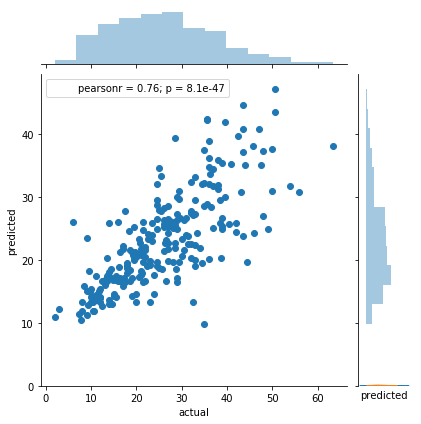

In [52]:
TEST = test()

In [53]:
TEST

(     predicted     actual
 0    19.050704  18.000000
 1    28.812631  24.500000
 2    26.056681   6.000000
 3    22.287531  17.000000
 4    16.519141  17.500000
 5    25.296548  27.000000
 6    17.117555  17.333333
 7    21.558951  18.500000
 8    26.072324  16.000000
 9    25.944011  14.000000
 10   18.968668  33.000000
 11   12.624036  12.333333
 12   31.889288  38.000000
 13   26.168389  27.500000
 14   35.187307  41.000000
 15   19.581584  34.500000
 16   25.718684  40.500000
 17   14.288343  11.500000
 18   16.451609  21.500000
 19   27.827756  17.500000
 20   13.345018  10.000000
 21   21.329546  19.800000
 22   15.383031  12.000000
 23   26.061802  21.500000
 24   15.099618  11.666667
 25   28.603724  27.000000
 26   24.303338  33.333333
 27   19.647294  24.500000
 28   27.395453  32.000000
 29   11.929139  10.750000
 ..         ...        ...
 215  20.511711  19.500000
 216  11.928928   8.000000
 217  24.865669  29.000000
 218  33.168768  33.000000
 219  11.348170   7.250000
 

In [54]:
model_save_path = './save_model/'

In [55]:
torch.save(m.state_dict(),'Age_Sex_TOTAL3norm_.pth')

In [44]:
m = Darknet([1,2,4,6,3], num_classes=1, nf=32)
m.double()
m.load_state_dict(torch.load('Age_Sex_TOTAL3norm_.pth'))

In [96]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
m.to(device)
print(device)

cuda:0


In [81]:
sns.pairplot

<function seaborn.axisgrid.pairplot(data, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='hist', markers=None, size=2.5, aspect=1, dropna=True, plot_kws=None, diag_kws=None, grid_kws=None)>

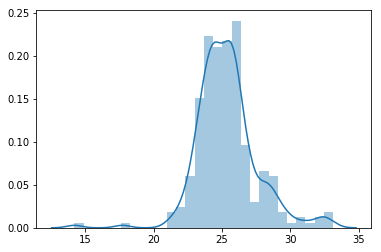

In [117]:
sns.distplot(y_pred)

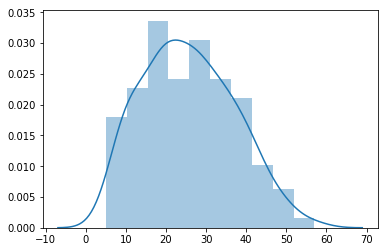

In [118]:
sns.distplot(y_test)

## MultiLabel

In [56]:
def conv_layer(ni, nf, ks=3, stride=1):
    return nn.Sequential(
        nn.Conv2d(ni, nf, kernel_size=ks, bias=False, stride=stride, padding=ks//2),
        nn.BatchNorm2d(nf, momentum=0.01),
        nn.LeakyReLU(negative_slope=0.1, inplace=False))

class ResLayer(nn.Module):
    def __init__(self, ni):
        super().__init__()
        self.conv1=conv_layer(ni, ni//2, ks=1)
        self.conv2=conv_layer(ni//2, ni, ks=3)
        
    def forward(self, x): return x.add_(self.conv2(self.conv1(x.clone())))

class Darknet(nn.Module):
    def make_group_layer(self, ch_in, num_blocks, stride=1):
        return [conv_layer(ch_in, ch_in*2,stride=stride)
               ] + [(ResLayer(ch_in*2)) for i in range(num_blocks)]

    def __init__(self, num_blocks, num_classes, nf=32):
        super().__init__()
        features = [conv_layer(1, nf, ks=3, stride=1)]
        for i,nb in enumerate(num_blocks):
            features += self.make_group_layer(nf, nb, stride=2-(i==1))
            nf *= 2                        
        features += [nn.AdaptiveAvgPool2d(1), Flatten()]        
        self.features = nn.Sequential(*features)
        fc1 = [nn.Linear(1054, 120), nn.BatchNorm1d(120, momentum=0.01), nn.LeakyReLU(negative_slope=0.1, inplace=False)]
        self.fc1 = nn.Sequential(*fc1)
        self.layers = nn.Sequential(nn.Linear(120,num_classes))
        
    def forward(self, x, y):
        x = x.unsqueeze(1)
        x1 = self.features(x)
        x = torch.cat((x1,y[:,:,0],y[:,:,1],y[:,:,2]),1)
        x = self.fc1(x)
        x = F.relu(x)
        #x = F.dropout(x, p=0.2, training=self.training)
        return F.log_softmax(self.layers(x), dim=-1)

In [57]:
ml = Darknet([1,2,4,6,3], num_classes=3, nf=32)
ml.double()
#m = nn.DataParallel(m, [1,2,3])

Darknet(
  (features): Sequential(
    (0): Sequential(
      (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.1)
    )
    (2): ResLayer(
      (conv1): Sequential(
        (0): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.01, affine=True, track_running_stats=True)
        (2): LeakyReLU(negative_slope=0.1)
      )
      (conv2): Sequential(
        (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.01, affine=True, track_running_st

In [60]:
optimizer = optim.RMSprop(ml.parameters(), lr = 1e-3)
criterion = nn.CrossEntropyLoss()
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma = 0.5)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
#device = "cpu"
ml.to(device)
print(device)

### Train

losslog=[]
vallog=[]

def train(niter):
    for epoch in trange(niter):  # loop over the dataset multiple times
        running_loss = 0.0        

        ml.train(True)
        scheduler.step()
        with tqdm(total=len(X_train)) as pbar:
            for i, (x, p, y) in enumerate(zip(X_train,param_train,y_train)):
                x,p,y = x.to(device), p.to(device),y.to(device)

                i += 1
                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = m(Variable(x),Variable(p))
                loss = criterion(outputs,Variable(y.long()).unsqueeze(1))
                loss.backward()
                optimizer.step()

                pbar.update()

                # print statistics
                running_loss += loss.item()
                if i % 20 == 19:    # print every 20 mini-batches
                    print('[%d, %5d]  Train MSE loss: %.3f' %
                          (epoch + 1, i + 1, running_loss / 20))
                    losslog.append(running_loss/20)
                    running_loss = 0.0
                    
            #Eval
        with tqdm(total=len(X_val)) as pbar:
            with torch.no_grad():
                predicted =[]
                for i, ( x, p, y) in enumerate(zip(X_val,param_val,y_val)):
                    x,p,y = x.to(device), p.to(device),y.to(device)

                    # forward + backward + optimize
                    outputs = m(x,p)
                    pred = outputs.squeeze(1).cpu().numpy().tolist()
                    predicted.append(pred)
                    pbar.update()

                predicted = list(chain.from_iterable(predicted))
                valloss = ((predicted-y_val.dataset) **2).mean()
                #valloss = abs(predicted-y_val.dataset).sum()/len(y_val.dataset)
                vallog.append(valloss)
                print(f'Val MSE loss: {valloss}')
            
    print('Finished Training')
    return losslog,vallog

cuda:0


In [61]:
MUL = train(1)

  0%|          | 0/65 [00:00<?, ?it/s]


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1524586445097/work/aten/src/THC/generic/THCStorage.cu:58